In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('hair_loss.csv')
df.head(4)

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2


In [16]:
X= (df[['total_protein','total_keratine','hair_texture' ,'vitamin','manganese','iron','calcium', 'body_water_content','stress_level','liver_data']])
y= (df[['hair_fall']])

#X = df.iloc[:,:-1]
#y = df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 42,
                                                    stratify = y)
len(X_train), len(X_test), len(y_train), len(y_test)

(80000, 20000, 80000, 20000)

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100,
                               random_state = 42)

model.fit(X_train, y_train)

<ipython-input-19-613f37198e52>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
model_predict = model.predict(X_test)
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           0       0.17      0.19      0.18      3338
           1       0.17      0.17      0.17      3327
           2       0.17      0.17      0.17      3348
           3       0.17      0.16      0.17      3309
           4       0.16      0.15      0.15      3307
           5       0.17      0.16      0.16      3371

    accuracy                           0.17     20000
   macro avg       0.17      0.17      0.17     20000
weighted avg       0.17      0.17      0.17     20000



In [22]:
f1_score(y_test, model_predict , average='macro')

0.1672973466905876

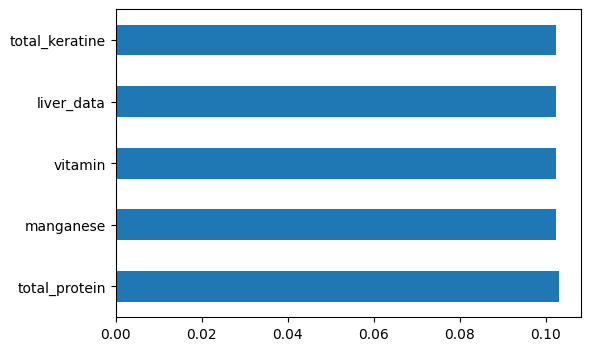

In [23]:
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind='barh',
                            figsize = (6,4));